In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv('/Users/pavlo.borysenko/Desktop/MLOps/data/new-york-air-quality.csv')
data.head()

,date,pm25,o3,no2,co
0,2024/5/1,54,30,16,2
1,2024/5/2,58,31,9,1
2,2024/5/3,26,21,8,1
3,2024/5/4,27,22,10,2
4,2024/5/5,24,12,18,3


In [61]:
data['date'] = pd.to_datetime(data['date'])
data['pm25'] = pd.to_numeric(data[' pm25'].str.strip(), errors='coerce')
data['o3'] = pd.to_numeric(data[' o3'].str.strip(), errors='coerce')
data['no2'] = pd.to_numeric(data[' no2'].str.strip(), errors='coerce')
data['co'] = pd.to_numeric(data[' co'].str.strip(), errors='coerce')

columns_to_keep = ['date', 'pm25', 'o3', 'no2', 'co']
data = data[columns_to_keep]

summary_statistics = data.describe()
summary_statistics


,pm25,o3,no2,co
count,3746.000000,1490.000000,1477.000000,1279.000000
mean,41.846770,78.233557,12.978334,2.072713
std,21.492347,142.145540,7.071897,1.056405
min,4.000000,1.000000,1.000000,1.000000
25%,27.000000,23.000000,8.000000,1.000000
50%,38.000000,30.000000,11.000000,2.000000
75%,50.000000,40.000000,16.000000,2.000000
max,247.000000,500.000000,44.000000,8.000000


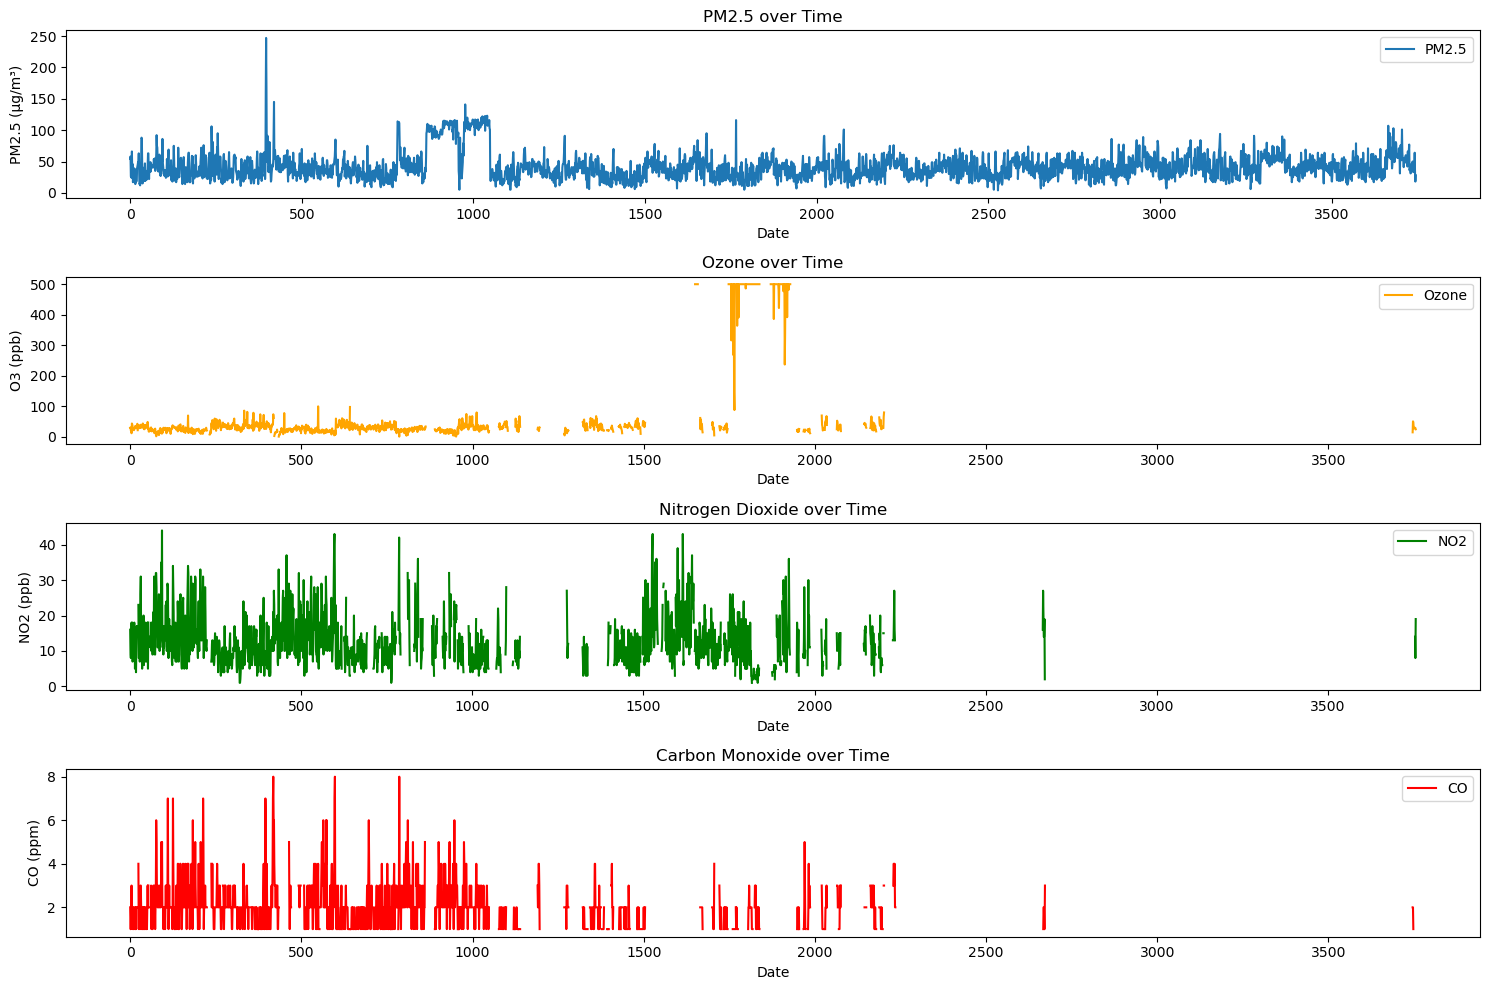

In [62]:
plt.figure(figsize=(15, 10))

# PM2.5
plt.subplot(4, 1, 1)
plt.plot(data.index, data['pm25'], label='PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 over Time')
plt.legend()

# Ozone
plt.subplot(4, 1, 2)
plt.plot(data.index, data['o3'], label='Ozone', color='orange')
plt.xlabel('Date')
plt.ylabel('O3 (ppb)')
plt.title('Ozone over Time')
plt.legend()

# Nitrogen Dioxide
plt.subplot(4, 1, 3)
plt.plot(data.index, data['no2'], label='NO2', color='green')
plt.xlabel('Date')
plt.ylabel('NO2 (ppb)')
plt.title('Nitrogen Dioxide over Time')
plt.legend()

# Carbon Monoxide
plt.subplot(4, 1, 4)
plt.plot(data.index, data['co'], label='CO', color='red')
plt.xlabel('Date')
plt.ylabel('CO (ppm)')
plt.title('Carbon Monoxide over Time')
plt.legend()

plt.tight_layout()
plt.show()

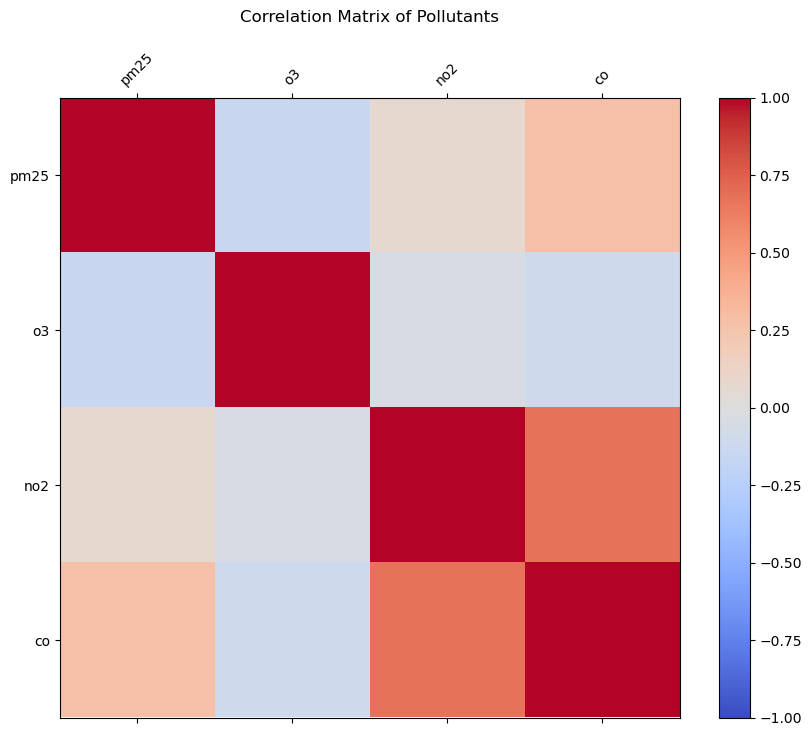

,pm25,o3,no2,co
pm25,1.000000,-0.141115,0.073135,0.278184
o3,-0.141115,1.000000,-0.053930,-0.101890
no2,0.073135,-0.053930,1.000000,0.674140
co,0.278184,-0.101890,0.674140,1.000000


In [63]:
correlation_matrix = data.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix of Pollutants', pad=20)
plt.show()

correlation_matrix

In [116]:
missing_rows = data[data.isnull().any(axis=1)]

missing_rows.head()

,Unnamed: 0,date,pm25,o3,no2,co


In [71]:
# Impute missing values using median for CO
data['co'].fillna(data['co'].median(), inplace=True)

# Impute missing values using mean for PM2.5
data['pm25'].fillna(data['pm25'].mean(), inplace=True)

# Use linear interpolation for O3 and NO2
data['o3'].interpolate(method='linear', inplace=True)
data['no2'].interpolate(method='linear', inplace=True)

remaining_missing_values = data.isnull().sum()

remaining_missing_values

date    0
pm25    0
o3      0
no2     0
co      0
dtype: int64

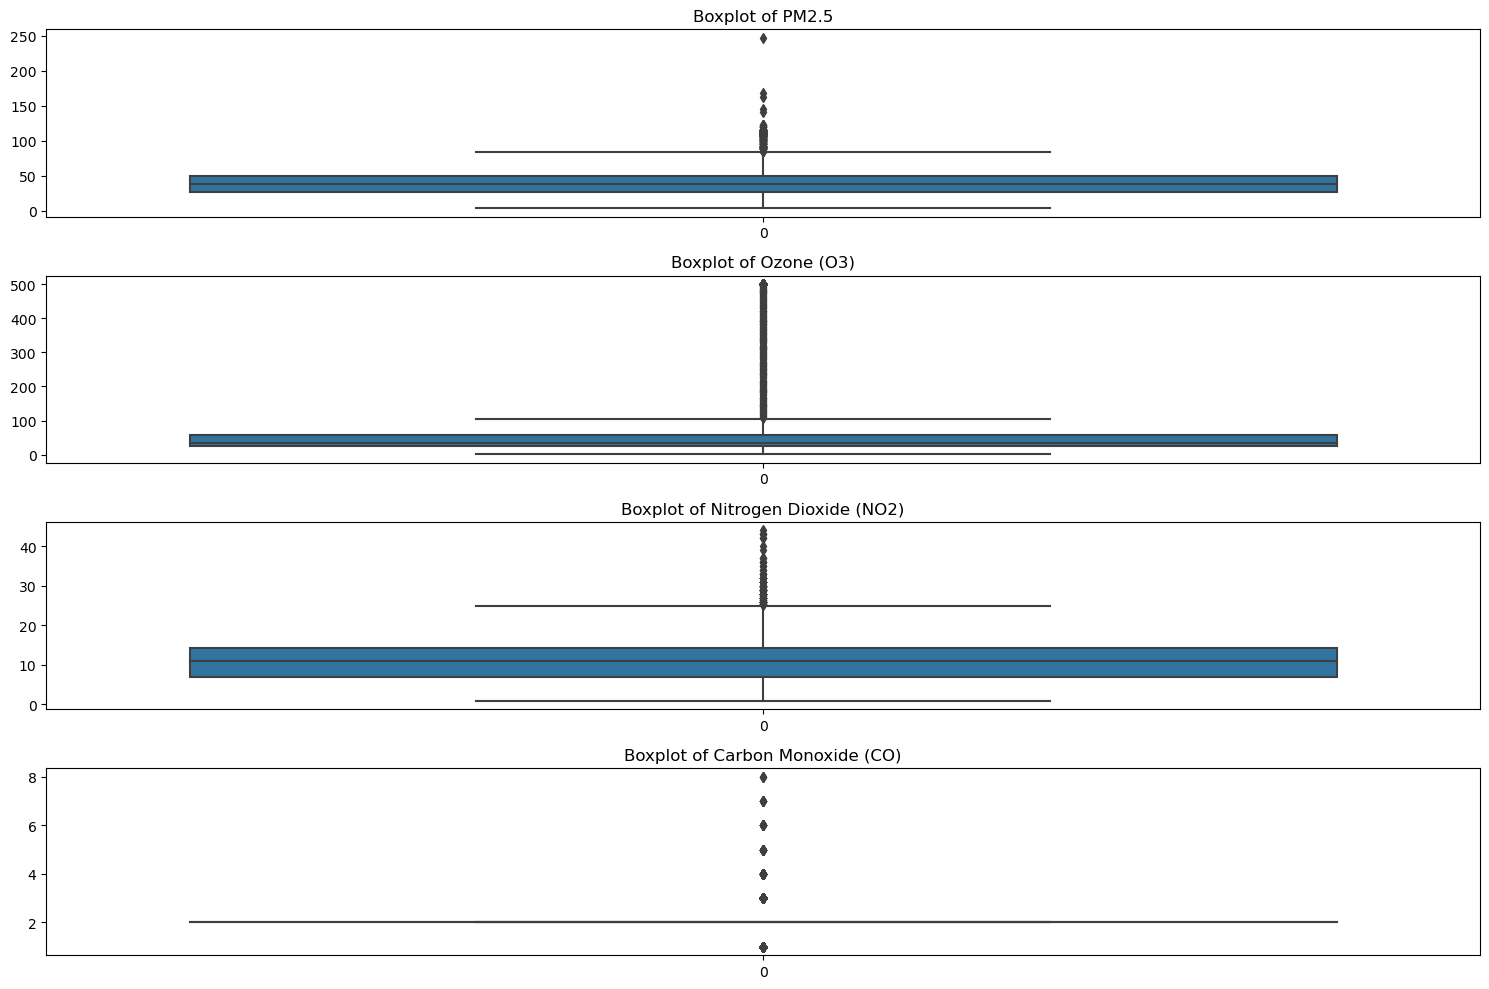

In [74]:
plt.figure(figsize=(15, 10))

# PM2.5
plt.subplot(4, 1, 1)
sns.boxplot(data['pm25'])
plt.title('Boxplot of PM2.5')

# Ozone
plt.subplot(4, 1, 2)
sns.boxplot(data['o3'])
plt.title('Boxplot of Ozone (O3)')

# Nitrogen Dioxide
plt.subplot(4, 1, 3)
sns.boxplot(data['no2'])
plt.title('Boxplot of Nitrogen Dioxide (NO2)')

# Carbon Monoxide
plt.subplot(4, 1, 4)
sns.boxplot(data['co'])
plt.title('Boxplot of Carbon Monoxide (CO)')

plt.tight_layout()
plt.show()

In [75]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for each pollutant
data_no_outliers = remove_outliers(data, 'pm25')
data_no_outliers = remove_outliers(data_no_outliers, 'o3')
data_no_outliers = remove_outliers(data_no_outliers, 'no2')
data_no_outliers = remove_outliers(data_no_outliers, 'co')

# Check the shape of the original and cleaned data
original_shape = data.shape
cleaned_shape = data_no_outliers.shape

original_shape, cleaned_shape


((3758, 5), (2607, 5))

In [79]:
# Save the cleaned data to a new CSV file
cleaned_file_path = './data/cleaned_new_york_air_quality.csv'
data_no_outliers.to_csv(cleaned_file_path)

cleaned_file_path

'cleaned_new_york_air_quality.csv'